In [124]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

%matplotlib inline
# %matplotlib notebook

plt.rcParams["figure.figsize"] = (10,6)
# plt.rcParams['figure.dpi'] = 100

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

pd.options.display.max_rows = 1000
pd.options.display.max_columns = 100

In [2]:
df=pd.read_csv("dataset.csv",sep=',')

## Data cleaning

In [3]:
df.head()

,restaurant_link,restaurant_name,original_location,country,region,province,city,address,latitude,longitude,claimed,awards,popularity_detailed,popularity_generic,top_tags,price_level,price_range,meals,cuisines,special_diets,features,vegetarian_friendly,vegan_options,gluten_free,original_open_hours,open_days_per_week,open_hours_per_week,working_shifts_per_week,avg_rating,total_reviews_count,default_language,reviews_count_in_default_language,excellent,very_good,average,poor,terrible,food,service,value,atmosphere,keywords
0,g10001637-d10002227,Le 147,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Ha...",France,Nouvelle-Aquitaine,Haute-Vienne,Saint-Jouvent,"10 Maison Neuve, 87510 Saint-Jouvent France",45.962,1.169,Claimed,NaN,#1 of 2 Restaurants in Saint-Jouvent,#1 of 2 places to eat in Saint-Jouvent,"Cheap Eats, French",€,NaN,"Lunch, Dinner",French,NaN,"Reservations, Seating, Wheelchair Accessible, ...",N,N,N,NaN,NaN,NaN,NaN,4.000,36.000,English,2.000,2.000,0.000,0.000,0.000,0.000,4.000,4.500,4.000,NaN,NaN
1,g10001637-d14975787,Le Saint Jouvent,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Ha...",France,Nouvelle-Aquitaine,Haute-Vienne,Saint-Jouvent,"16 Place de l Eglise, 87510 Saint-Jouvent France",45.957,1.205,Unclaimed,NaN,#2 of 2 Restaurants in Saint-Jouvent,#2 of 2 places to eat in Saint-Jouvent,Cheap Eats,€,NaN,NaN,NaN,NaN,NaN,N,N,N,NaN,NaN,NaN,NaN,4.000,5.000,All languages,5.000,2.000,2.000,1.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN
2,g10002858-d4586832,Au Bout du Pont,"[""Europe"", ""France"", ""Centre-Val de Loire"", ""B...",France,Centre-Val de Loire,Berry,Rivarennes,"2 rue des Dames, 36800 Rivarennes France",46.636,1.386,Claimed,NaN,#1 of 1 Restaurant in Rivarennes,#1 of 1 places to eat in Rivarennes,"Cheap Eats, French, European",€,NaN,"Dinner, Lunch, Drinks","French, European",NaN,"Reservations, Seating, Table Service, Wheelcha...",N,N,N,NaN,NaN,NaN,NaN,5.000,13.000,English,4.000,3.000,1.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN
3,g10002986-d3510044,Le Relais de Naiade,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Co...",France,Nouvelle-Aquitaine,Correze,Lacelle,"9 avenue Porte de la Correze 19170, 19170 Lace...",45.643,1.824,Claimed,NaN,#1 of 1 Restaurant in Lacelle,#1 of 1 places to eat in Lacelle,"Cheap Eats, French",€,NaN,"Lunch, Dinner",French,NaN,"Reservations, Seating, Serves Alcohol, Table S...",N,N,N,NaN,NaN,NaN,NaN,4.000,34.000,English,1.000,1.000,0.000,0.000,0.000,0.000,4.500,4.500,4.500,NaN,NaN
4,g10022428-d9767191,Relais Du MontSeigne,"[""Europe"", ""France"", ""Occitanie"", ""Aveyron"", ""...",France,Occitanie,Aveyron,Saint-Laurent-de-Levezou,"route du Montseigne, 12620 Saint-Laurent-de-Le...",44.209,2.960,Unclaimed,NaN,#1 of 1 Restaurant in Saint-Laurent-de-Levezou,#1 of 1 places to eat in Saint-Laurent-de-Levezou,"Mid-range, French",€€-€€€,NaN,"Lunch, Dinner",French,NaN,"Reservations, Seating, Wheelchair Accessible, ...",N,N,N,NaN,NaN,NaN,NaN,4.500,11.000,All languages,11.000,4.000,7.000,0.000,0.000,0.000,4.500,4.500,4.500,NaN,NaN


In [4]:
df.head(2).T

,0,1
restaurant_link,g10001637-d10002227,g10001637-d14975787
restaurant_name,Le 147,Le Saint Jouvent
original_location,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Ha...","[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Ha..."
country,France,France
region,Nouvelle-Aquitaine,Nouvelle-Aquitaine
province,Haute-Vienne,Haute-Vienne
city,Saint-Jouvent,Saint-Jouvent
address,"10 Maison Neuve, 87510 Saint-Jouvent France","16 Place de l Eglise, 87510 Saint-Jouvent France"
latitude,45.962,45.957
longitude,1.169,1.205


In [5]:
df.shape

(1083397, 42)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083397 entries, 0 to 1083396
Data columns (total 42 columns):
 #   Column                             Non-Null Count    Dtype  
---  ------                             --------------    -----  
 0   restaurant_link                    1083397 non-null  object 
 1   restaurant_name                    1083397 non-null  object 
 2   original_location                  1083397 non-null  object 
 3   country                            1083397 non-null  object 
 4   region                             1033074 non-null  object 
 5   province                           742765 non-null   object 
 6   city                               682712 non-null   object 
 7   address                            1083397 non-null  object 
 8   latitude                           1067607 non-null  float64
 9   longitude                          1067607 non-null  float64
 10  claimed                            1081555 non-null  object 
 11  awards                  

In [7]:
#The percentage of null values of each column 
#Next we can consider removing the missing values of columns or dropping the columns which has more than %90 missing values
df.isnull().sum()/df.shape[0]*100

restaurant_link                      0.000
restaurant_name                      0.000
original_location                    0.000
country                              0.000
region                               4.645
province                            31.441
city                                36.984
address                              0.000
latitude                             1.457
longitude                            1.457
claimed                              0.170
awards                              75.712
popularity_detailed                  8.768
popularity_generic                   9.026
top_tags                            10.212
price_level                         25.587
price_range                         71.910
meals                               41.356
cuisines                            15.609
special_diets                       68.594
features                            70.703
vegetarian_friendly                  0.000
vegan_options                        0.000
gluten_free

In [8]:
df.duplicated().sum()

0

In [9]:
df.restaurant_link.value_counts()

g10001637-d10002227    1
g187801-d7776707       1
g187801-d7716055       1
g187801-d7720844       1
g187801-d7724087       1
                      ..
g187439-d7901240       1
g187439-d790546        1
g187439-d7912563       1
g187439-d7914791       1
g9867250-d14979687     1
Name: restaurant_link, Length: 1083397, dtype: int64

In [11]:
#All link are unique
len(df.restaurant_link.unique())

1083397

In [12]:
#There are some restaurants which their name are same
len(df.restaurant_name.unique())

840914

In [13]:
df.select_dtypes(include=['float'])

,latitude,longitude,open_days_per_week,open_hours_per_week,working_shifts_per_week,avg_rating,total_reviews_count,reviews_count_in_default_language,excellent,very_good,average,poor,terrible,food,service,value,atmosphere
0,45.962,1.169,NaN,NaN,NaN,4.000,36.000,2.000,2.000,0.000,0.000,0.000,0.000,4.000,4.500,4.000,NaN
1,45.957,1.205,NaN,NaN,NaN,4.000,5.000,5.000,2.000,2.000,1.000,0.000,0.000,NaN,NaN,NaN,NaN
2,46.636,1.386,NaN,NaN,NaN,5.000,13.000,4.000,3.000,1.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN
3,45.643,1.824,NaN,NaN,NaN,4.000,34.000,1.000,1.000,0.000,0.000,0.000,0.000,4.500,4.500,4.500,NaN
4,44.209,2.960,NaN,NaN,NaN,4.500,11.000,11.000,4.000,7.000,0.000,0.000,0.000,4.500,4.500,4.500,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1083392,47.173,27.519,7.000,84.000,7.000,2.500,2.000,1.000,0.000,0.000,0.000,0.000,1.000,NaN,NaN,NaN,NaN
1083393,45.904,25.471,7.000,98.000,7.000,2.000,6.000,5.000,0.000,1.000,1.000,1.000,2.000,NaN,NaN,NaN,NaN
1083394,47.632,24.451,NaN,NaN,NaN,3.000,2.000,2.000,1.000,0.000,0.000,0.000,1.000,NaN,NaN,NaN,NaN
1083395,44.919,24.868,5.000,55.000,5.000,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
number_columns=[col for col in df.columns.tolist() if df[col].dtype not in ['object','<M8[ns]']] 
number_columns

['latitude',
 'longitude',
 'open_days_per_week',
 'open_hours_per_week',
 'working_shifts_per_week',
 'avg_rating',
 'total_reviews_count',
 'reviews_count_in_default_language',
 'excellent',
 'very_good',
 'average',
 'poor',
 'terrible',
 'food',
 'service',
 'value',
 'atmosphere']

In [18]:
object_columns=[col for col in df.columns.tolist() if df[col].dtype in ['object','<M8[ns]']] 
object_columns

['restaurant_link',
 'restaurant_name',
 'original_location',
 'country',
 'region',
 'province',
 'city',
 'address',
 'claimed',
 'awards',
 'popularity_detailed',
 'popularity_generic',
 'top_tags',
 'price_level',
 'price_range',
 'meals',
 'cuisines',
 'special_diets',
 'features',
 'vegetarian_friendly',
 'vegan_options',
 'gluten_free',
 'original_open_hours',
 'default_language',
 'keywords']

In [291]:
df[object_columns]

,restaurant_link,restaurant_name,original_location,country,region,province,city,address,claimed,awards,popularity_detailed,popularity_generic,top_tags,price_level,price_range,meals,cuisines,special_diets,features,vegetarian_friendly,vegan_options,gluten_free,original_open_hours,default_language,keywords
0,g10001637-d10002227,Le 147,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Ha...",France,Nouvelle-Aquitaine,Haute-Vienne,Saint-Jouvent,"10 Maison Neuve, 87510 Saint-Jouvent France",Claimed,NaN,#1 of 2 Restaurants in Saint-Jouvent,#1 of 2 places to eat in Saint-Jouvent,"Cheap Eats, French",€,NaN,"Lunch, Dinner",French,NaN,"Reservations, Seating, Wheelchair Accessible, ...",N,N,N,NaN,English,NaN
1,g10001637-d14975787,Le Saint Jouvent,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Ha...",France,Nouvelle-Aquitaine,Haute-Vienne,Saint-Jouvent,"16 Place de l Eglise, 87510 Saint-Jouvent France",Unclaimed,NaN,#2 of 2 Restaurants in Saint-Jouvent,#2 of 2 places to eat in Saint-Jouvent,Cheap Eats,€,NaN,NaN,NaN,NaN,NaN,N,N,N,NaN,All languages,NaN
2,g10002858-d4586832,Au Bout du Pont,"[""Europe"", ""France"", ""Centre-Val de Loire"", ""B...",France,Centre-Val de Loire,Berry,Rivarennes,"2 rue des Dames, 36800 Rivarennes France",Claimed,NaN,#1 of 1 Restaurant in Rivarennes,#1 of 1 places to eat in Rivarennes,"Cheap Eats, French, European",€,NaN,"Dinner, Lunch, Drinks","French, European",NaN,"Reservations, Seating, Table Service, Wheelcha...",N,N,N,NaN,English,NaN
3,g10002986-d3510044,Le Relais de Naiade,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Co...",France,Nouvelle-Aquitaine,Correze,Lacelle,"9 avenue Porte de la Correze 19170, 19170 Lace...",Claimed,NaN,#1 of 1 Restaurant in Lacelle,#1 of 1 places to eat in Lacelle,"Cheap Eats, French",€,NaN,"Lunch, Dinner",French,NaN,"Reservations, Seating, Serves Alcohol, Table S...",N,N,N,NaN,English,NaN
4,g10022428-d9767191,Relais Du MontSeigne,"[""Europe"", ""France"", ""Occitanie"", ""Aveyron"", ""...",France,Occitanie,Aveyron,Saint-Laurent-de-Levezou,"route du Montseigne, 12620 Saint-Laurent-de-Le...",Unclaimed,NaN,#1 of 1 Restaurant in Saint-Laurent-de-Levezou,#1 of 1 places to eat in Saint-Laurent-de-Levezou,"Mid-range, French",€€-€€€,NaN,"Lunch, Dinner",French,NaN,"Reservations, Seating, Wheelchair Accessible, ...",N,N,N,NaN,All languages,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1083392,g9710275-d10770782,Complex Popas Pacurari,"[""Europe"", ""Romania"", ""Northeast Romania"", ""Ia...",Romania,Northeast Romania,Iasi County,NaN,"Soseaua Pacurari, Valea Lupului 707410 Romania",Unclaimed,NaN,#1 of 1 Restaurant in Valea Lupului,#1 of 1 places to eat in Valea Lupului,NaN,NaN,NaN,"Lunch, Dinner",NaN,NaN,NaN,N,N,N,"{""Mon"": [""10:00-22:00""], ""Tue"": [""10:00-22:00""...",English,NaN
1083393,g9716321-d15026574,Casa Pastravarului DORIPESCO,"[""Europe"", ""Romania"", ""Transylvania"", ""Central...",Romania,Transylvania,Brasov County,Apata,"DN 13 Judetul Kilometrul 33 Maierus, Apata 507...",Claimed,NaN,#1 of 1 Restaurant in Apata,#1 of 1 places to eat in Apata,"Mid-range, Eastern European",€€-€€€,NaN,"Breakfast, Lunch, Dinner, Brunch, Drinks",Eastern European,NaN,NaN,N,N,N,"{""Mon"": [""08:00-22:00""], ""Tue"": [""08:00-22:00""...",English,NaN
1083394,g9722813-d15891057,Hanul Tentea,"[""Europe"", ""Romania"", ""Transylvania"", ""Northwe...",Romania,Transylvania,Maramures County,Sacel,"DN17C, Sacel Romania",Unclaimed,NaN,#1 of 1 Restaurant in Sacel,#1 of 1 places to eat in Sacel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,N,NaN,English,NaN
1083395,g9726871-d21391722,Casa Paduraru,"[""Europe"", ""Romania"", ""Southern Romania"", ""Arg...",Romania,Southern Romania,Arges County,NaN,"Sat. Argeselu Numarul 432, Maracineni 117450 R...",Claimed,NaN,NaN,NaN,"Cheap Eats, French, American, Bar",€,€2-€8,"Breakfast, Lunch, Dinner, Brunch, Drinks","French, American, Bar, International, European...",NaN,NaN,N,N,N,"{""Mon"": [""10:00-21:00""], ""T

In [27]:
for column in df.columns:
   print(f' The {column} is :',pd.api.types.infer_dtype(df[column]))
   
   

 The restaurant_link is : string
 The restaurant_name is : string
 The original_location is : string
 The country is : string
 The region is : string
 The province is : string
 The city is : string
 The address is : string
 The latitude is : floating
 The longitude is : floating
 The claimed is : string
 The awards is : string
 The popularity_detailed is : string
 The popularity_generic is : string
 The top_tags is : string
 The price_level is : string
 The price_range is : string
 The meals is : string
 The cuisines is : string
 The special_diets is : string
 The features is : string
 The vegetarian_friendly is : string
 The vegan_options is : string
 The gluten_free is : string
 The original_open_hours is : string
 The open_days_per_week is : floating
 The open_hours_per_week is : floating
 The working_shifts_per_week is : floating
 The avg_rating is : floating
 The total_reviews_count is : floating
 The default_language is : string
 The reviews_count_in_default_language is : floatin

In [29]:
#check the columns with mixed data types
def get_mixed_columns(df_):
    return (df_
                .select_dtypes("object") # performance gain: only columns whith an object dtype can have mixed types
                .apply(pd.api.types.infer_dtype) # get a string describing the type
                .loc[lambda x: x.str.contains("mixed")] # select columns with mixed dtypes
           )
df.pipe(get_mixed_columns)

Series([], dtype: object)

In [30]:
#If we use below code instead of pd.api.types.infer_dtype(df[c])).startswith("mixed"),
#it consider nan value so we must remove nan values to get exact solution
#that is because of nan values of columns which are listed below, these columns are considered as mixed type
for col in df.columns:
    weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis=1)
    if len(df[weird]) > 0:
        print(col)

region
province
city
claimed
awards
popularity_detailed
popularity_generic
top_tags
price_level
price_range
meals
cuisines
special_diets
features
original_open_hours
default_language
keywords


In [34]:
##Just only try to above code after removing all nan values form dataframe, you get that there is no mixed type
df_1=df.dropna()

In [35]:
for col in df_1.columns:
    weird = (df_1[[col]].applymap(type) != df_1[[col]].iloc[0].apply(type)).any(axis=1)
    if len(df_1[weird]) > 0:
        print(col)

In [38]:
for col in df_1.columns:
   l=map(type,df_1[col])
   print(f'The types of {col} :',set(l))

The types of restaurant_link : {<class 'str'>}
The types of restaurant_name : {<class 'str'>}
The types of original_location : {<class 'str'>}
The types of country : {<class 'str'>}
The types of region : {<class 'str'>}
The types of province : {<class 'str'>}
The types of city : {<class 'str'>}
The types of address : {<class 'str'>}
The types of latitude : {<class 'float'>}
The types of longitude : {<class 'float'>}
The types of claimed : {<class 'str'>}
The types of awards : {<class 'str'>}
The types of popularity_detailed : {<class 'str'>}
The types of popularity_generic : {<class 'str'>}
The types of top_tags : {<class 'str'>}
The types of price_level : {<class 'str'>}
The types of price_range : {<class 'str'>}
The types of meals : {<class 'str'>}
The types of cuisines : {<class 'str'>}
The types of special_diets : {<class 'str'>}
The types of features : {<class 'str'>}
The types of vegetarian_friendly : {<class 'str'>}
The types of vegan_options : {<class 'str'>}
The types of glute

In [36]:
if mixed_dtypes := {c: dtype for c in df.columns if (dtype := pd.api.types.infer_dtype(df[c])).startswith("mixed")}:
    raise TypeError(f"Dataframe has one more mixed dtypes: {mixed_dtypes}")
else:
    print('There is no mixed types')

There is no mixed types


As I understood when we don't consider Nan values there is no mixed data types. Above I used some of the functions to define the mixed types. If we use the code "pd.api.types.infer_dtype(df[column])" we don't need to remove missing value to define mixed data types.Howewer if we use the code dtype only we must remove nan values to get the truth if mixed type is available or not 

## Data Understanding

### 1.	Are the review columns correlated with the rating columns? 

In [40]:
Review_columns=["excellent", "very_good", "average", "poor", "terrible", "total_reviews_count", "reviews_count_in_default_language"]
Rating_columns=["food", "service", "value", "atmosphere", "avg_rating"]


In [47]:
df.corr()

,latitude,longitude,open_days_per_week,open_hours_per_week,working_shifts_per_week,avg_rating,total_reviews_count,reviews_count_in_default_language,excellent,very_good,average,poor,terrible,food,service,value,atmosphere
latitude,1.000,0.081,0.025,-0.078,-0.148,-0.038,-0.044,0.096,0.079,0.096,0.100,0.112,0.104,-0.029,-0.003,-0.027,-0.037
longitude,0.081,1.000,0.030,0.102,-0.008,0.045,-0.038,-0.120,-0.110,-0.110,-0.106,-0.116,-0.120,0.027,-0.011,0.011,0.044
open_days_per_week,0.025,0.030,1.000,0.510,0.378,-0.200,0.052,0.072,0.043,0.088,0.096,0.103,0.118,-0.205,-0.191,-0.178,-0.139
open_hours_per_week,-0.078,0.102,0.510,1.000,-0.075,-0.173,-0.005,0.038,0.008,0.058,0.071,0.076,0.098,-0.202,-0.184,-0.148,-0.093
working_shifts_per_week,-0.148,-0.008,0.378,-0.075,1.000,-0.064,0.102,-0.015,-0.019,-0.004,-0.006,-0.011,-0.018,-0.059,-0.073,-0.085,-0.126
avg_rating,-0.038,0.045,-0.200,-0.173,-0.064,1.000,0.036,0.039,0.094,0.012,-0.043,-0.076,-0.155,0.823,0.806,0.774,0.629
total_reviews_count,-0.044,-0.038,0.052,-0.005,0.102,0.036,1.000,0.737,0.716,0.711,0.634,0.540,0.449,0.057,0.037,-0.005,0.094
reviews_count_in_default_language,0.096,-0.120,0.072,0.038,-0.015,0.039,0.737,1.000,0.959,0.948,0.887,0.806,0.674,0.055,0.062,0.027,0.101
excellent,0.079,-0.110,0.043,0.008,-0.019,0.094,0.716,0.959,1.000,0.843,0.733,0.633,0.498,0.129,0.135,0.099,0.167
very_good,0.096,-0.110,0.088,0.058,-0.004,0.012,0.711,0.948,0.843,1.000,0.928,0.825,0.673,0.016,0.021,-0.010,0.067


<AxesSubplot:>

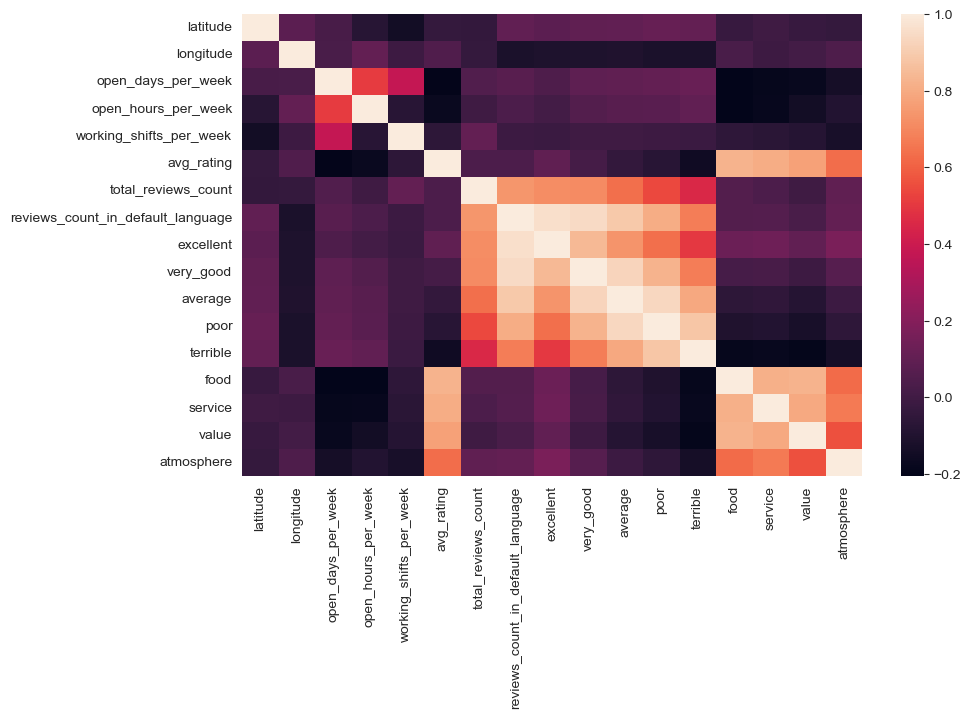

In [49]:
# plot the heatmap
sns.heatmap(df.corr(), 
        xticklabels=df.corr().columns,
        yticklabels=df.corr().columns)

In [50]:
corr_review_rating=df.corr()[Review_columns].loc[Rating_columns]
corr_review_rating

,excellent,very_good,average,poor,terrible,total_reviews_count,reviews_count_in_default_language
food,0.129,0.016,-0.060,-0.104,-0.190,0.057,0.055
service,0.135,0.021,-0.051,-0.093,-0.182,0.037,0.062
value,0.099,-0.010,-0.083,-0.126,-0.196,-0.005,0.027
atmosphere,0.167,0.067,-0.015,-0.058,-0.139,0.094,0.101
avg_rating,0.094,0.012,-0.043,-0.076,-0.155,0.036,0.039


<AxesSubplot:>

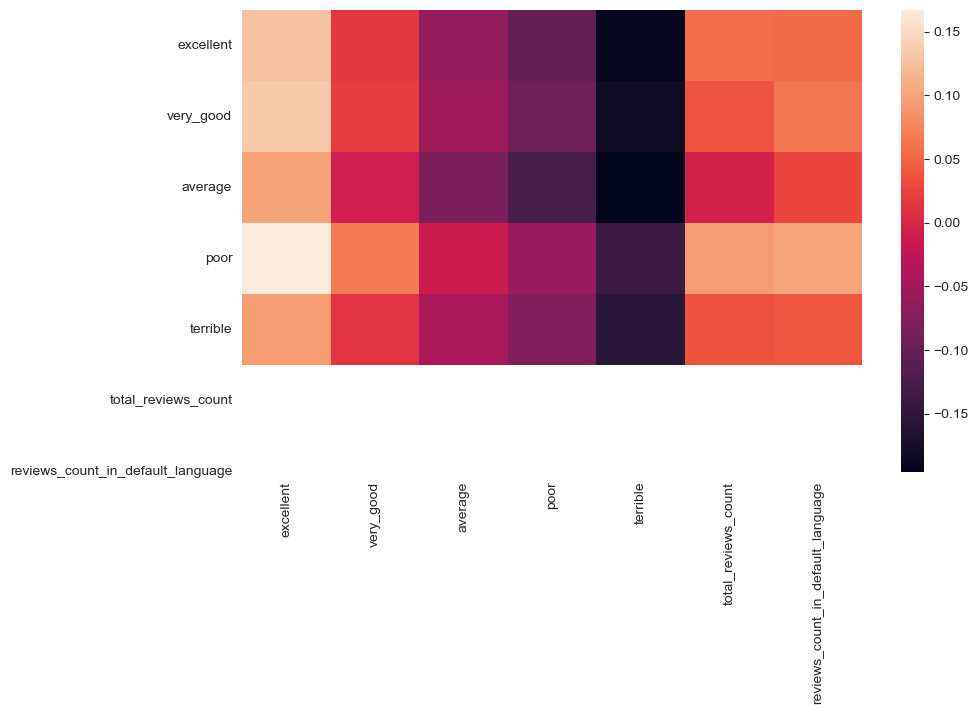

In [51]:
sns.heatmap(corr_review_rating, 
        xticklabels=corr_review_rating.columns,
        yticklabels=corr_review_rating.columns)

I didn't observe more than abs(0.2) correlation between them so I can say no big correlation between them howewer when we checked the smallest correlation the range -0.2<corr<0.2 can be valuable 

### 2.	Are vegetarian-friendly restaurants better than non-vegetarian ones?

In [53]:
df.vegetarian_friendly.value_counts()

N    759380
Y    324017
Name: vegetarian_friendly, dtype: int64

In [55]:
vegetarian_friendly_restaurants =df[df.vegetarian_friendly=='Y']


In [58]:
vegetarian_friendly_restaurants['avg_rating'].max()

5.0

In [59]:
vegetarian_friendly_restaurants['avg_rating'].min()

1.0

In [60]:
vegetarian_friendly_restaurants['avg_rating'].mean()

4.176085894200317

In [62]:
vegetarian_friendly_restaurants[Rating_columns].describe()

,food,service,value,atmosphere,avg_rating
count,310508.000,310840.000,310661.000,158684.000,323328.000
mean,4.235,4.192,4.092,4.032,4.176
std,0.443,0.472,0.473,0.481,0.447
min,1.500,1.000,1.000,1.000,1.000
25%,4.000,4.000,4.000,4.000,4.000
50%,4.500,4.000,4.000,4.000,4.000
75%,4.500,4.500,4.500,4.500,4.500
max,5.000,5.000,5.000,5.000,5.000


In [72]:
vegetarian_friendly_restaurants['avg_rating'].value_counts()

4.500    135661
4.000    118030
3.500     40978
5.000     19459
3.000      8032
2.500      1031
2.000       120
1.000        12
1.500         5
Name: avg_rating, dtype: int64

<AxesSubplot:>

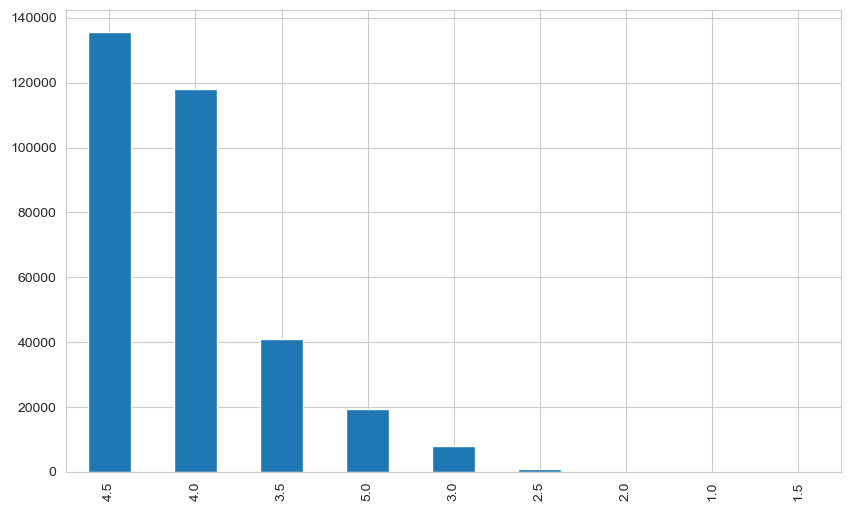

In [71]:
vegetarian_friendly_restaurants['avg_rating'].value_counts().plot(kind='bar')

In [63]:
Non_vegetarian=df[df.vegetarian_friendly=='N']

In [64]:
Non_vegetarian[Rating_columns].describe()

,food,service,value,atmosphere,avg_rating
count,288817.000,293447.000,292031.000,103101.000,663433.000
mean,3.963,3.935,3.867,3.782,3.968
std,0.641,0.652,0.651,0.623,0.804
min,1.000,1.000,1.000,1.000,1.000
25%,3.500,3.500,3.500,3.500,3.500
50%,4.000,4.000,4.000,4.000,4.000
75%,4.500,4.500,4.500,4.000,4.500
max,5.000,5.000,5.000,5.000,5.000


In [73]:
Non_vegetarian['avg_rating'].value_counts()

4.000    178949
4.500    158133
5.000    108648
3.500    106309
3.000     62294
2.500     25534
2.000     13336
1.000      6369
1.500      3861
Name: avg_rating, dtype: int64

<AxesSubplot:>

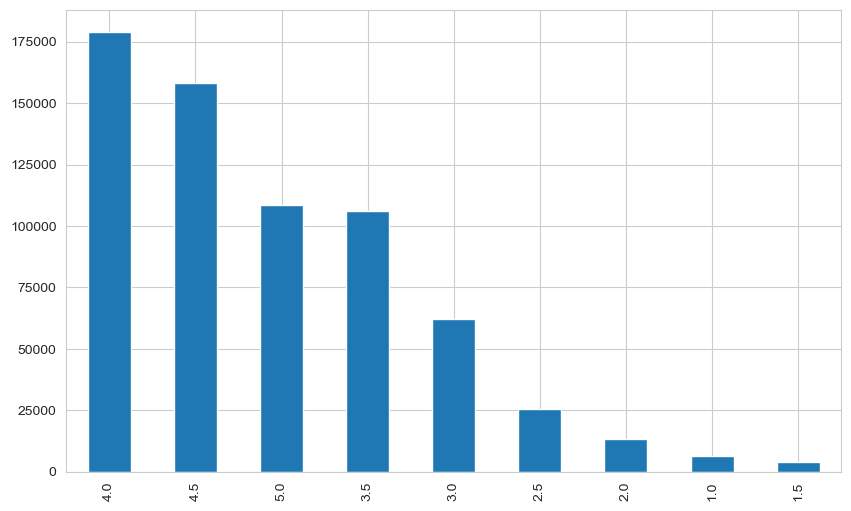

In [70]:
Non_vegetarian['avg_rating'].value_counts().plot(kind='bar')

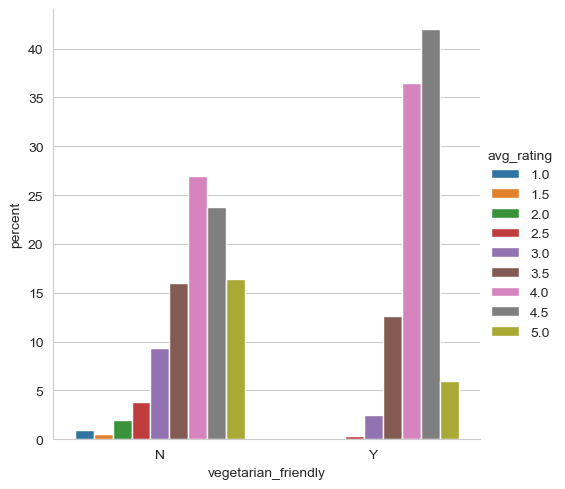

In [295]:
x,y = 'vegetarian_friendly','avg_rating'

(df
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))
# sns.countplot(data=df, x="avg_rating", hue="vegetarian_friendly")



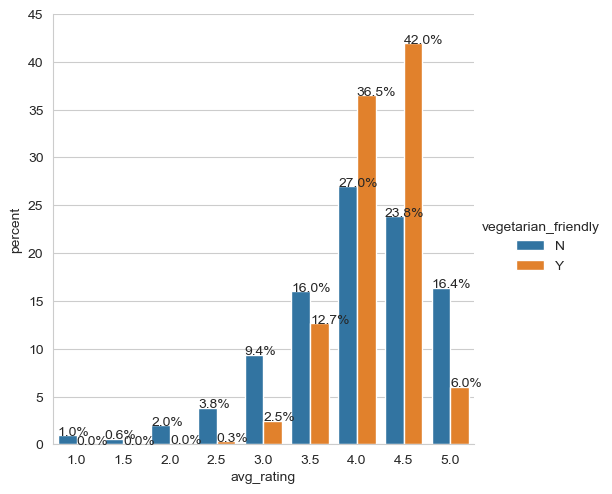

In [318]:
df1=df.groupby('vegetarian_friendly')['avg_rating'].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x='avg_rating',y='percent',hue='vegetarian_friendly',kind='bar',data=df1)
g.ax.set_ylim(0,45)

for p in g.ax.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

Although the number of Non_vegetarian restaurants is twice as much as the number of vegetarian_friendly_restaurants, When we see the percentage value of avg_rating , We can say that the performance of vegetarian_friendly_restaurants can be better than Non_vegetarian restaurants

### 3.	Are there any significantly more expensive cuisines?

In [ ]:
#price_level	price_range	meals	cuisines

In [79]:
df.price_range.value_counts()

€10-€30      5937
€5-€15       5810
€10-€20      5148
€5-€20       4793
€10-€25      4448
             ... 
€69-€127        1
€55-€58         1
€40-€127        1
€224-€230       1
€35-€180        1
Name: price_range, Length: 7298, dtype: int64

In [81]:
df.price_range.nunique()

7298

In [87]:
price_list=list(df.price_range.dropna().unique())
price_list

['€14-€29',
 '€8-€17',
 '€10-€35',
 '€12-€26',
 '€12-€30',
 '€10-€50',
 '€10-€30',
 '€7-€14',
 '€11-€23',
 '€26-€106',
 '€3-€17',
 '€12-€40',
 '€17-€25',
 '€11-€18',
 '€10-€45',
 '€4-€20',
 '€9-€25',
 '€12-€25',
 '€12-€33',
 '€8-€25',
 '€5-€65',
 '€10-€25',
 '€18-€25',
 '€6-€15',
 '€21-€60',
 '€10-€15',
 '€15-€35',
 '€5-€20',
 '€10-€20',
 '€10-€28',
 '€30-€50',
 '€13-€25',
 '€14-€35',
 '€7-€45',
 '€9-€35',
 '€24-€31',
 '€4-€9',
 '€10-€16',
 '€13-€18',
 '€4-€11',
 '€15-€25',
 '€11-€20',
 '€3-€8',
 '€13-€30',
 '€13-€26',
 '€15-€20',
 '€5-€10',
 '€7-€15',
 '€10-€17',
 '€6-€11',
 '€6-€12',
 '€9-€13',
 '€40-€65',
 '€25-€41',
 '€18-€29',
 '€3-€15',
 '€12-€20',
 '€18-€39',
 '€20-€36',
 '€9-€20',
 '€25-€50',
 '€15-€30',
 '€5-€15',
 '€7-€20',
 '€8-€28',
 '€29-€49',
 '€10-€14',
 '€15-€29',
 '€60-€120',
 '€13-€22',
 '€15-€28',
 '€22-€25',
 '€2-€10',
 '€4-€15',
 '€33-€73',
 '€8-€14',
 '€8-€12',
 '€11-€19',
 '€15-€50',
 '€16-€30',
 '€28-€58',
 '€7-€25',
 '€24-€39',
 '€12-€56',
 '€39-€138',
 '€5-€16

In [97]:
# new_list=[]
# for p in price_list:
#     try:
#         new_list.append([p,int(p.split('-')[1].replace('€','').replace(',','').replace('CHF',''))])
#     except:
#         print(p)
        

In [103]:
#I take the max range of restautant to find expensiveness
# take second element for sort
def takeSecond(elem):
    return elem[1]
max_range_price=[[p,int(p.split('-')[1].replace('€','').replace(',','').replace('CHF',''))] for p in price_list  ]
max_range_price.sort(key=takeSecond,reverse=True)
max_range_price

[['€82,794,888-€745,153,984', 745153984],
 ['€166,390,048-€665,560,192', 665560192],
 ['€7-€142,504,064', 142504064],
 ['€12-€123,456,792', 123456792],
 ['€30-€100,000,000', 100000000],
 ['€10-€100,000,000', 100000000],
 ['€4,400,000-€100,000,000', 100000000],
 ['€60-€100,000,000', 100000000],
 ['€92,541,544-€92,541,544', 92541544],
 ['€2-€82,794,888', 82794888],
 ['€6-€20,295,888', 20295888],
 ['€4-€10,000,000', 10000000],
 ['€18-€10,000,000', 10000000],
 ['€10-€10,000,000', 10000000],
 ['€2-€9,999,999', 9999999],
 ['€6-€9,999,999', 9999999],
 ['€3-€9,999,999', 9999999],
 ['€15-€9,999,999', 9999999],
 ['€61,188-€6,847,366', 6847366],
 ['€68,344-€6,834,414', 6834414],
 ['€4-€5,000,000', 5000000],
 ['€3-€3,000,000', 3000000],
 ['€200-€2,000,000', 2000000],
 ['€0-€1,112,293', 1112293],
 ['€10-€1,000,000', 1000000],
 ['€5-€1,000,000', 1000000],
 ['€15-€999,999', 999999],
 ['€5-€982,147', 982147],
 ['€80,000-€500,000', 500000],
 ['€8-€309,635', 309635],
 ['€10-€200,000', 200000],
 ['€1,682

In [104]:
#Check if the price_level give information about expensive howewer there is no valuable information we can continue with price_range
df.price_level.value_counts()

€€-€€€    537918
€         240205
€€€€       28069
Name: price_level, dtype: int64

In [108]:
df.price_range[df.price_level=='€€-€€€']

4              NaN
5          €14-€29
6           €8-€17
7          €10-€35
8          €12-€26
            ...   
1083387        NaN
1083388        NaN
1083389        NaN
1083390        NaN
1083393        NaN
Name: price_range, Length: 537918, dtype: object

In [110]:
#Let say more than 500 euro is expensive than check their cuisines
len([i for i in max_range_price if i[1]>500])

667

In [114]:
expensive_restaurant_price=[i[0] for i in max_range_price if i[1]>500]
expensive_restaurant_price

['€82,794,888-€745,153,984',
 '€166,390,048-€665,560,192',
 '€7-€142,504,064',
 '€12-€123,456,792',
 '€30-€100,000,000',
 '€10-€100,000,000',
 '€4,400,000-€100,000,000',
 '€60-€100,000,000',
 '€92,541,544-€92,541,544',
 '€2-€82,794,888',
 '€6-€20,295,888',
 '€4-€10,000,000',
 '€18-€10,000,000',
 '€10-€10,000,000',
 '€2-€9,999,999',
 '€6-€9,999,999',
 '€3-€9,999,999',
 '€15-€9,999,999',
 '€61,188-€6,847,366',
 '€68,344-€6,834,414',
 '€4-€5,000,000',
 '€3-€3,000,000',
 '€200-€2,000,000',
 '€0-€1,112,293',
 '€10-€1,000,000',
 '€5-€1,000,000',
 '€15-€999,999',
 '€5-€982,147',
 '€80,000-€500,000',
 '€8-€309,635',
 '€10-€200,000',
 '€1,682-€142,304',
 '€8-€100,000',
 '€2-€100,000',
 '€3-€100,000',
 '€10-€100,000',
 '€100,000-€100,000',
 '€15-€99,999',
 '€2-€99,999',
 '€10-€50,000',
 '€750-€50,000',
 '€23,872-€47,745',
 '€8,248-€46,187',
 '€1,666-€41,644',
 '€412-€41,239',
 '€29,108-€37,424',
 '€516-€37,313',
 '€115-€34,484',
 '€207-€24,148',
 '€23-€23,295',
 '€5,000-€20,000',
 '€13,000-€20,0

In [126]:
df_expensive=df[['cuisines','price_range']].dropna()[df.price_range.map(lambda x: x in expensive_restaurant_price)]


In [127]:
df_expensive

,cuisines,price_range
1307,"French, Healthy","€600-€1,000"
1338,"French, Healthy, Gastropub","€19-€12,000"
3822,French,"€50-€1,000"
6527,French,"€621-€1,118"
11410,"Contemporary, Gastropub",€29-€900
12024,French,"€24-€10,000"
16355,French,"€12-€1,200"
16900,"Salvadoran, Azerbaijani, French, South America...",€662-€827
19863,French,"€350-€1,650"
20310,"Italian, Pizza, Neapolitan, Campania, Southern...",€5-€600


In [128]:
#Finding value counts is not significant , since all are different
df_expensive.value_counts()


cuisines                                                                                                             price_range              
Spanish                                                                                                              €2-€1,000                    3
Pizza                                                                                                                €13-€575                     3
Spanish                                                                                                              €10-€1,000                   2
Italian, Pizza                                                                                                       €500-€2,000                  2
Italian, Pizza, Seafood, Mediterranean                                                                               €10-€1,000                   2
Italian, Mediterranean, Neapolitan, Campania, Southern-Italian                                                       

In [201]:
#So we can search the most repeated one
most_repeated=[k.strip()  for i in df_expensive.cuisines for k in i.split(',')]
len(most_repeated)
    

2137

In [202]:
#The more expensive cuisines
pd.Series(most_repeated).value_counts()

European                   199
Italian                    183
Mediterranean              133
Pub                         94
Bar                         90
British                     89
Pizza                       83
Seafood                     81
Cafe                        75
Asian                       55
Hungarian                   55
International               53
French                      48
Spanish                     46
Fast food                   43
Indian                      39
Barbecue                    37
Healthy                     34
American                    34
Wine Bar                    33
Chinese                     29
Grill                       29
Sushi                       27
Japanese                    26
Central European            25
Southern-Italian            22
Street Food                 19
Greek                       19
Steakhouse                  19
German                      19
Swedish                     19
Diner                       16
Scandina

## Business-specific

In [156]:
df_business=pd.read_csv('europe_capitals_population_and_area.csv',sep=';')


In [159]:
df_business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CityNo        31 non-null     int64 
 1   City          31 non-null     object
 2   Country       31 non-null     object
 3   Population    31 non-null     int64 
 4   Area in km2   31 non-null     object
dtypes: int64(2), object(3)
memory usage: 1.3+ KB


In [179]:
df_business

,CityNo,City,Country,Population,Area in km2
0,1,Amsterdam,Netherland,851573,"219,32"
1,2,Athens,Greece,664046,2929
2,4,Barcelona,Spain,1620809,"101,4"
3,4,Berlin,Germany,3711930,"891,7"
4,5,Bratislava,Slovakia,424428,"367,6"
5,6,Brussels,Belgium,1191604,"161,38"
6,7,Budapest,Hungary,1779361,"525,2"
7,8,Copenhagen,Denmark,602481,"88,25"
8,9,Dublin,Ireland,527612,115
9,10,Edinburgh,Scotland,482005,264


In [162]:
df_business.tail()

,CityNo,City,Country,Population,Area in km2
26,27,Rome,Italy,2868782,1285
27,28,Stockholm,Sweden,952058,188
28,29,Vienna,Austria,1889083,"414,6"
29,30,Warsaw,Poland,1764615,517
30,31,Zurich,Switzerland,409241,"87,93"


In [164]:
city_list=list(df_business.City)

In [170]:
df.city.map(lambda x: x in city_list).value_counts()

False    987425
True      95972
Name: city, dtype: int64

In [177]:
df_gluten_free=df[['city','country','gluten_free']][(df.gluten_free=='Y')& (df.city.map(lambda x: x in city_list))]
df_gluten_free

,city,country,gluten_free
38544,Paris,France,Y
38557,Paris,France,Y
38567,Paris,France,Y
38570,Paris,France,Y
38578,Paris,France,Y
...,...,...,...
1066904,Copenhagen,Denmark,Y
1066921,Copenhagen,Denmark,Y
1066930,Copenhagen,Denmark,Y
1066931,Copenhagen,Denmark,Y


In [178]:
df_gluten_free.groupby('city').value_counts().sort_values()

city        country          gluten_free
Lyon        France           Y                54
Bratislava  Slovakia         Y                67
Helsinki    Finland          Y               199
Copenhagen  Denmark          Y               251
Munich      Germany          Y               256
Athens      Greece           Y               271
Stockholm   Sweden           Y               366
Prague      Czech Republic   Y               389
Vienna      Austria          Y               413
Budapest    Hungary          Y               433
Lisbon      Portugal         Y               537
Paris       France           Y               582
Dublin      Ireland          Y               596
Amsterdam   The Netherlands  Y               622
Milan       Italy            Y              1154
Madrid      Spain            Y              1368
Rome        Italy            Y              1654
dtype: int64

In [192]:
city_with_gluten_free=list(df_gluten_free.groupby('city').value_counts().index.get_level_values('city'))
city_with_gluten_free

['Amsterdam',
 'Athens',
 'Bratislava',
 'Budapest',
 'Copenhagen',
 'Dublin',
 'Helsinki',
 'Lisbon',
 'Lyon',
 'Madrid',
 'Milan',
 'Munich',
 'Paris',
 'Prague',
 'Rome',
 'Stockholm',
 'Vienna']

In [198]:
#Cities which doesn't have gluten free restaurant
df_business[df_business.City.map(lambda x:x not in city_with_gluten_free )].sort_values(by='Population',ascending=False)

,CityNo,City,Country,Population,Area in km2
16,17,London,England,8825000,607
3,4,Berlin,Germany,3711930,"891,7"
11,12,Hamburg,Germany,1822445,755
29,30,Warsaw,Poland,1764615,517
2,4,Barcelona,Spain,1620809,"101,4"
5,6,Brussels,Belgium,1191604,"161,38"
13,14,Krakow,Poland,765320,327
23,24,Oslo,Norway,634293,454
17,18,Luxembourg,Luxembourg,590667,"2586,4"
9,10,Edinburgh,Scotland,482005,264


According to above list , top of the 5 cities can be chosen since the population is most and there is no gluten free restautant available

### 2.	Think and propose a couple of other ways this dataset could be used to help businesses.

We can repeat the business of gluten free restautant for the vegetarian_friendly restaurants. As we searched above , although the number of vegetarian_friendly restaurants  are less than non_vegetarian restaurants, the performance is better than non_vegetarian restaurants so the number of vegetarian_friendly restaurants can be increased 

In [327]:
df_vegetarian_friendly=df[['city','country','vegetarian_friendly']][(df.vegetarian_friendly=='Y')& (df.city.map(lambda x: x in city_list))]
df_vegetarian_friendly

,city,country,vegetarian_friendly
38543,Paris,France,Y
38544,Paris,France,Y
38546,Paris,France,Y
38551,Paris,France,Y
38557,Paris,France,Y
...,...,...,...
1066935,Copenhagen,Denmark,Y
1066938,Copenhagen,Denmark,Y
1066939,Copenhagen,Denmark,Y
1066948,Copenhagen,Denmark,Y


In [328]:
df_vegetarian_friendly.groupby('city').value_counts().sort_values()

city        country          vegetarian_friendly
Bratislava  Slovakia         Y                       211
Helsinki    Finland          Y                       468
Lyon        France           Y                       515
Copenhagen  Denmark          Y                       689
Athens      Greece           Y                       750
Stockholm   Sweden           Y                       908
Dublin      Ireland          Y                      1053
Budapest    Hungary          Y                      1065
Lisbon      Portugal         Y                      1180
Prague      Czech Republic   Y                      1232
Munich      Germany          Y                      1652
Amsterdam   The Netherlands  Y                      1802
Vienna      Austria          Y                      1855
Madrid      Spain            Y                      2411
Milan       Italy            Y                      2870
Paris       France           Y                      4388
Rome        Italy            Y         

In [329]:
city_with_vegetarian_friendly=list(df_vegetarian_friendly.groupby('city').value_counts().index.get_level_values('city'))
city_with_vegetarian_friendly

['Amsterdam',
 'Athens',
 'Bratislava',
 'Budapest',
 'Copenhagen',
 'Dublin',
 'Helsinki',
 'Lisbon',
 'Lyon',
 'Madrid',
 'Milan',
 'Munich',
 'Paris',
 'Prague',
 'Rome',
 'Stockholm',
 'Vienna']

In [330]:
#Cities which doesn't have gluten free restaurant
df_business[df_business.City.map(lambda x:x not in city_with_vegetarian_friendly )].sort_values(by='Population',ascending=False)

,CityNo,City,Country,Population,Area in km2
16,17,London,England,8825000,607
3,4,Berlin,Germany,3711930,"891,7"
11,12,Hamburg,Germany,1822445,755
29,30,Warsaw,Poland,1764615,517
2,4,Barcelona,Spain,1620809,"101,4"
5,6,Brussels,Belgium,1191604,"161,38"
13,14,Krakow,Poland,765320,327
23,24,Oslo,Norway,634293,454
17,18,Luxembourg,Luxembourg,590667,"2586,4"
9,10,Edinburgh,Scotland,482005,264


The best idea is that this capital can be chosen for vegetarian friendly restaurants

## Bonus

In [199]:
df_polygon = pd.read_json('paris_bounding_polygon.json')
df_polygon

,0,1
0,2.224,48.853
1,2.224,48.853
2,2.224,48.854
3,2.224,48.854
4,2.224,48.854
5,2.224,48.854
6,2.224,48.854
7,2.224,48.854
8,2.224,48.855
9,2.224,48.855


In [247]:
df_polygon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 919 entries, 0 to 918
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       919 non-null    float64
 1   1       919 non-null    float64
dtypes: float64(2)
memory usage: 14.5 KB


In [218]:
max_long=df_polygon[0].max()
min_long=df_polygon[0].min()
min_lat=df_polygon[1].min()
max_lat=df_polygon[1].max()

In [ ]:
df_polygon.columns=['longitude','latitude']
df_polygon

In [255]:
color_scale = [(0, 'orange'), (1,'red')]

# fig = px.scatter_mapbox(df_italian_in_Paris, 
#                         lat="latitude", 
#                         lon="longitude", 
# #                         hover_name="Address", 
# #                         hover_data=["Address", "Listed"],
# #                         color="Listed",
#                         color_continuous_scale=color_scale,
# #                         size="Listed",
#                         zoom=8, 
#                         height=800,
#                         width=800)
fig=px.scatter_mapbox(df_polygon, lat='latitude', 
                        lon='longitude',     color_continuous_scale=color_scale,
#                         size="Listed",
                        zoom=8, 
                        height=800,
                        width=800)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [203]:
df[df.city=='Paris']

,restaurant_link,restaurant_name,original_location,country,region,province,city,address,latitude,longitude,claimed,awards,popularity_detailed,popularity_generic,top_tags,price_level,price_range,meals,cuisines,special_diets,features,vegetarian_friendly,vegan_options,gluten_free,original_open_hours,open_days_per_week,open_hours_per_week,working_shifts_per_week,avg_rating,total_reviews_count,default_language,reviews_count_in_default_language,excellent,very_good,average,poor,terrible,food,service,value,atmosphere,keywords
38542,g187147-d10000085,La Cucina,"[""Europe"", ""France"", ""Ile-de-France"", ""Paris""]",France,Ile-de-France,NaN,Paris,"36 boulevard Garibaldi, 75015 Paris France",48.847,2.305,Unclaimed,NaN,#13163 of 15478 Restaurants in Paris,#13978 of 18480 places to eat in Paris,Italian,NaN,NaN,NaN,Italian,NaN,NaN,N,N,N,NaN,NaN,NaN,NaN,3.500,2.000,All languages,2.000,1.000,0.000,0.000,1.000,0.000,NaN,NaN,NaN,NaN,NaN
38543,g187147-d10002410,le réciproque,"[""Europe"", ""France"", ""Ile-de-France"", ""Paris""]",France,Ile-de-France,NaN,Paris,"14 rue Ferdinand Flocon, 75018 Paris France",48.892,2.346,Claimed,"Travellers' Choice, Michelin 2021 for Bib Gour...",#115 of 15478 Restaurants in Paris,#119 of 18480 places to eat in Paris,"Mid-range, French, European, Contemporary",€€-€€€,€21-€47,NaN,"French, European, Contemporary",Vegetarian Friendly,NaN,Y,N,N,"{""Mon"": [], ""Tue"": [""12:00-20:00""], ""Wed"": [""1...",5.000,40.000,5.000,5.000,308.000,English,39.000,32.000,6.000,1.000,0.000,0.000,5.000,5.000,4.500,NaN,NaN
38544,g187147-d10005308,Umami Matcha Cafe,"[""Europe"", ""France"", ""Ile-de-France"", ""Paris""]",France,Ile-de-France,NaN,Paris,"22 rue Beranger, 75003 Paris France",48.867,2.363,Claimed,"Travellers' Choice, Certificate of Excellence ...",#2054 of 15478 Restaurants in Paris,#2169 of 18480 places to eat in Paris,"Mid-range, Japanese, Cafe, Asian",€€-€€€,€3-€25,NaN,"Japanese, Cafe, Asian","Vegetarian Friendly, Vegan Options, Gluten Fre...",NaN,Y,Y,Y,"{""Mon"": [], ""Tue"": [""10:00-19:00""], ""Wed"": [""1...",6.000,53.000,6.000,4.000,214.000,English,32.000,14.000,13.000,2.000,2.000,1.000,4.500,4.000,3.500,NaN,NaN
38545,g187147-d10007161,Le Pré Salé,"[""Europe"", ""France"", ""Ile-de-France"", ""Paris""]",France,Ile-de-France,NaN,Paris,"22 rue du Moulin des Pres, 75013 Paris France",48.828,2.353,Claimed,"Travellers' Choice, Certificate of Excellence ...",#406 of 15478 Restaurants in Paris,#428 of 18480 places to eat in Paris,"Mid-range, French, European",€€-€€€,NaN,"Lunch, Dinner","French, European",NaN,"Reservations, Seating, Serves Alcohol, Accepts...",N,N,N,"{""Mon"": [""12:15-15:00"", ""19:15-22:45""], ""Tue"":...",5.000,31.250,10.000,4.500,187.000,English,17.000,11.000,6.000,0.000,0.000,0.000,4.500,4.500,4.500,NaN,NaN
38546,g187147-d10023831,Marlon,"[""Europe"", ""France"", ""Ile-de-France"", ""Paris""]",France,Ile-de-France,NaN,Paris,"159 rue de Grenelle, 75007 Paris France",48.858,2.307,Claimed,NaN,#9725 of 15478 Restaurants in Paris,#10365 of 18480 places to eat in Paris,"Mid-range, American, Vegetarian Friendly, Vega...",€€-€€€,NaN,"Breakfast, Lunch, Dinner, Brunch",American,"Vegetarian Friendly, Vegan Options",NaN,Y,Y,N,NaN,NaN,NaN,NaN,3.500,207.000,English,46.000,20.000,13.000,7.000,2.000,4.000,3.500,3.500,3.000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56666,g187147-d9991537,Le Versance Gourmet,"[""Europe"", ""France"", ""Ile-de-France"", ""Paris""]",France,Ile-de-France,NaN,Paris,"2 rue des Panoramas, 75002 Paris France",48.870,2.341,Claimed,NaN,#7772 of 15476 Restaurants in Paris,#8285 of 18479 places to eat in Paris,"Cheap Eats, French",€,NaN,Lunch,French,NaN,"Takeout, Outdoor Seating, Highchairs Available...",N,N,N,"{""Mon"": [""11:45-17:00""], ""Tue"": [""11:45-17:00""...",5.000,26.250,5.000,5.000,11.000,English,1.000,1.000,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN

In [221]:
df.latitude.map(lambda x: min_lat<x<max_lat)

24862

In [223]:
df_in_paris_polygon=df[(df.city=='Paris')&(df.latitude.map(lambda x: min_lat<x<max_lat))&(df.longitude.map(lambda x:  min_long<x<max_long))]

In [235]:
df_in_paris_polygon.dropna(subset=['cuisines'],inplace=True)

In [243]:
df_italian_in_Paris=df_in_paris_polygon[df_in_paris_polygon.cuisines.map(lambda x : 'italian' in x.strip().lower())]

In [244]:
df_italian_in_Paris

,restaurant_link,restaurant_name,original_location,country,region,province,city,address,latitude,longitude,claimed,awards,popularity_detailed,popularity_generic,top_tags,price_level,price_range,meals,cuisines,special_diets,features,vegetarian_friendly,vegan_options,gluten_free,original_open_hours,open_days_per_week,open_hours_per_week,working_shifts_per_week,avg_rating,total_reviews_count,default_language,reviews_count_in_default_language,excellent,very_good,average,poor,terrible,food,service,value,atmosphere,keywords
38542,g187147-d10000085,La Cucina,"[""Europe"", ""France"", ""Ile-de-France"", ""Paris""]",France,Ile-de-France,NaN,Paris,"36 boulevard Garibaldi, 75015 Paris France",48.847,2.305,Unclaimed,NaN,#13163 of 15478 Restaurants in Paris,#13978 of 18480 places to eat in Paris,Italian,NaN,NaN,NaN,Italian,NaN,NaN,N,N,N,NaN,NaN,NaN,NaN,3.500,2.000,All languages,2.000,1.000,0.000,0.000,1.000,0.000,NaN,NaN,NaN,NaN,NaN
38554,g187147-d10027353,L'inconnu,"[""Europe"", ""France"", ""Ile-de-France"", ""Paris""]",France,Ile-de-France,NaN,Paris,"4 rue Pierre Leroux, 75007 Paris France",48.850,2.319,Claimed,Michelin 2021 for The Michelin Plate: Good coo...,#1159 of 15478 Restaurants in Paris,#1229 of 18480 places to eat in Paris,"Fine Dining, Italian, European",€€€€,NaN,"Lunch, Dinner","Italian, European",NaN,"Reservations, Seating, Wheelchair Accessible, ...",N,N,N,NaN,NaN,NaN,NaN,4.500,127.000,English,26.000,19.000,5.000,1.000,0.000,1.000,4.500,4.500,4.000,NaN,NaN
38555,g187147-d10027589,Soyouz,"[""Europe"", ""France"", ""Ile-de-France"", ""Paris""]",France,Ile-de-France,NaN,Paris,"11 rue de l Esperance, 75013 Paris France",48.827,2.349,Unclaimed,NaN,#9028 of 15478 Restaurants in Paris,#9635 of 18480 places to eat in Paris,"Cheap Eats, Italian, Pizza",€,NaN,NaN,"Italian, Pizza",NaN,"Reservations, Seating, Wheelchair Accessible",N,N,N,NaN,NaN,NaN,NaN,4.000,15.000,English,1.000,0.000,0.000,0.000,0.000,1.000,4.000,4.000,4.000,NaN,NaN
38569,g187147-d10034691,Marius,"[""Europe"", ""France"", ""Ile-de-France"", ""Paris""]",France,Ile-de-France,NaN,Paris,"186 rue Ordener, 75018 Paris France",48.894,2.333,Claimed,NaN,#7473 of 15478 Restaurants in Paris,#7957 of 18480 places to eat in Paris,"Cheap Eats, Italian",€,€10-€20,"Dinner, Lunch, After-hours, Drinks",Italian,NaN,NaN,N,N,N,"{""Mon"": [""12:00-15:00"", ""18:30-23:00""], ""Tue"":...",7.000,52.500,14.000,4.500,16.000,English,2.000,2.000,0.000,0.000,0.000,0.000,4.500,5.000,5.000,NaN,NaN
38572,g187147-d10039974,PI HOUR Batignolles,"[""Europe"", ""France"", ""Ile-de-France"", ""Paris""]",France,Ile-de-France,NaN,Paris,"16 rue Jacquemont, 75017 Paris France",48.888,2.322,Claimed,Certificate of Excellence 2017,#3982 of 15478 Restaurants in Paris,#4204 of 18480 places to eat in Paris,"Mid-range, Italian, Pizza, Vegetarian Friendly",€€-€€€,€10-€25,NaN,"Italian, Pizza",Vegetarian Friendly,NaN,Y,N,N,NaN,NaN,NaN,NaN,4.500,47.000,All languages,47.000,34.000,11.000,1.000,0.000,1.000,4.500,4.500,4.500,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56612,g187147-d9826837,Pizza Verdi,"[""Europe"", ""France"", ""Ile-de-France"", ""Paris""]",France,Ile-de-France,NaN,Paris,"40 rue du Faubourg Saint Denis, 75010 Paris Fr...",48.871,2.354,Claimed,NaN,#11044 of 15476 Restaurants in Paris,#11759 of 18480 places to eat in Paris,"Cheap Eats, Italian, Pizza, Vegetarian Friendly",€,€9-€17,NaN,"Italian, Pizza",Vegetarian Friendly,NaN,Y,N,N,NaN,NaN,NaN,NaN,3.500,24.000,English,2.000,0.000,0.000,2.000,0.000,0.000,3.500,3.500,4.000,NaN,NaN
56636,g187147-d9849038,66 Yeast,"[""Europe"", ""France"", ""Ile-de-France"", ""Paris""]",France,Ile-de-France,NaN,Paris,"66 rue d Hauteville, 75010 Paris France",48.875,2.351,Unclaimed,NaN,#7702 of 15476 Restaurants in Paris,#8207 of 18480 places to eat in Paris,"Mid-range, Italian, Pizza",€€-€€€,€8-€20,Dinner,"Pizza, Italian",NaN,NaN,N,N,N,NaN,NaN,

In [268]:
df_polygon['color']='area'

In [269]:
df_polygon

,longitude,latitude,color
0,2.224,48.853,area
1,2.224,48.853,area
2,2.224,48.854,area
3,2.224,48.854,area
4,2.224,48.854,area
5,2.224,48.854,area
6,2.224,48.854,area
7,2.224,48.854,area
8,2.224,48.855,area
9,2.224,48.855,area


In [272]:
color_scale = [(0, 'orange'), (1,'red')]

fig = px.scatter_mapbox(df_italian_in_Paris, 
                        lat="latitude", 
                        lon="longitude", 
                        hover_name="cuisines", 
#                         hover_data=["Address", "Listed"],

                        color_continuous_scale=color_scale,
#                         size="Listed",
                        zoom=8, 
                        height=800,
                        width=800)

color_discrete_map = {'area': 'rgb(255,0,0)'}

fig2 = px.line_mapbox(df_polygon, lat="latitude", lon="longitude",zoom=8,color_discrete_map=color_discrete_map,color='color')
fig.add_trace(fig2.data[0]) # adds the line trace to the first figure
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()


In [286]:
lat_list=[48.88578,48.88094,48.874,48.87716,48.88578]
log_list=[2.381632,2.374226,2.38408,2.39541,2.381632]

In [287]:
df_best_location=pd.DataFrame([lat_list,log_list]).T
df_best_location.columns=['latitude','longitude']
df_best_location['color']='area'

In [288]:
df_best_location

,latitude,longitude,color
0,48.886,2.382,area
1,48.881,2.374,area
2,48.874,2.384,area
3,48.877,2.395,area
4,48.886,2.382,area


In [289]:
color_scale = [(0, 'orange'), (1,'red')]

fig = px.scatter_mapbox(df_italian_in_Paris, 
                        lat="latitude", 
                        lon="longitude", 
                        hover_name="cuisines", 
#                         hover_data=["Address", "Listed"],

                        color_continuous_scale=color_scale,
#                         size="Listed",
                        zoom=8, 
                        height=800,
                        width=800)

color_discrete_map = {'area': 'rgb(255,0,0)'}
color_discrete_map_2 = {'area': 'rgb(0,255,0)'}
fig2 = px.line_mapbox(df_polygon, lat="latitude", lon="longitude",zoom=8,color_discrete_map=color_discrete_map,color='color')
fig.add_trace(fig2.data[0]) # adds the line trace to the first figure
fig3 = px.line_mapbox(df_best_location, lat="latitude", lon="longitude",zoom=8,color_discrete_map=color_discrete_map_2,color='color')
fig.add_trace(fig3.data[0]) # adds the line trace to the first figure
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

The polygon defined with green color is one of the suitable place for new italian restaurants